In [2]:
# Sample 10 000 data points with original Rosenblatt transformation.

from sample import *

winddata = rosenblatt(10000)

In [3]:
### To do 2: run crude monte carlo simualation,
#aim: use created wind data, to obtain an estimate of the loads.

import _utils as ut

# compute loads
loads = ut.MysteriousLoadFunc(winddata)

# calculate statistics
loads_mean = np.mean(loads)
loads_std = np.std(loads)

print(f"Mean of loads: {loads_mean} \t Std of loads: {loads_std} \n \
     These are only approximate values for this realisation of the Monte Carlo samples!")

Mean of loads: 63091.68020468196 	 Std of loads: 8009.160556948722 
      These are only approximate values for this realisation of the Monte Carlo samples!


Text(0.5, 1.0, 'Loads over alpha')

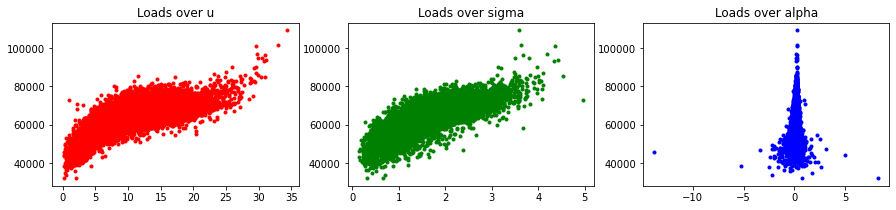

In [4]:
# lets have a look at the data

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3,figsize=[15,3])
axs[0].plot(winddata[:,0],loads,'.r')
axs[0].set_title("Loads over u")
axs[1].plot(winddata[:,1],loads,'.g')
axs[1].set_title("Loads over sigma")
axs[2].plot(winddata[:,2],loads,'.b')
axs[2].set_title("Loads over alpha")

In [5]:
### Try regression as in 4.2 

#necessary imports
import sklearn
import sklearn.neural_network
from sklearn.model_selection import train_test_split

#create Regression objects, try different ; 

#investigate the influence of hidden layers. Is it only computational time? Does accuracy vary?

#-------> verbose=True is interesting, but clutters the output

parameters = {'activation': 'relu',
              'learning_rate': 'adaptive',
              'max_iter': 750,
              'random_state': 1,  
              'verbose': False,
              'early_stopping': True,
              'n_iter_no_change': 10}

# Initialize regressors
reg_low_unscaled    = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(10,10), **parameters)
reg_medium_unscaled = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,100), **parameters)
reg_high_unscaled   = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,100,100), **parameters)

# also create some to fit with scaled data, just to see if it changes something
reg_low    = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(10,10), **parameters)
reg_medium = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,100), **parameters)
reg_high   = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,100,100), **parameters)

# Create training and test data sets: (shown in documentation of MLPregressor)
# it would also work to just create a new training data set using the function ... there are many options
#--------> maybe kick out alpha -> there is not really something to see from regression I suppose. Let's try anyways
train_in, test_in, train_out, test_out = train_test_split(winddata,loads, test_size=0.25, random_state=1, shuffle=True)
# We might also need a scaled data set: #--------> Scaling before or after splitting? 
#----------> decide for before: statistical properties are "more representative" when used with bigger dataset. 
winddata_scaled = (winddata - winddata.mean(axis=0))/winddata.std(axis=0)
loads_scaled = ( loads - np.mean(loads) ) / np.std(loads)
train_in_scaled, test_in_scaled, train_out_scaled, test_out_scaled = train_test_split(winddata_scaled,loads_scaled, test_size=0.25, random_state=1, shuffle=True)

In [6]:
# Fit the models and calculate the score with test data.
reg_low_unscaled.fit(train_in,train_out)
score_low_unscaled = reg_low_unscaled.score(test_in, test_out)
score_low_unscaled

C:\Users\morit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6844977044174086

In [7]:
reg_low.fit(train_in_scaled,train_out_scaled)
score_low = reg_low.score(test_in_scaled, test_out_scaled)
score_low

0.7450075631575501

In [8]:
reg_medium_unscaled.fit(train_in,train_out)
score_medium_unscaled = reg_medium_unscaled.score(test_in, test_out)
score_medium_unscaled

0.6535871150533243

In [9]:
reg_medium.fit(train_in_scaled,train_out_scaled)
score_medium = reg_medium.score(test_in_scaled, test_out_scaled)
score_medium

0.7473007311196762

In [10]:
reg_high_unscaled.fit(train_in,train_out)
score_high_unscaled = reg_high_unscaled.score(test_in, test_out)
score_high_unscaled

0.6556918089949517

In [11]:
reg_high.fit(train_in_scaled,train_out_scaled)
score_high = reg_high.score(test_in_scaled, test_out_scaled)
score_high

0.750204147123668

Text(0, 0.5, 'Score')

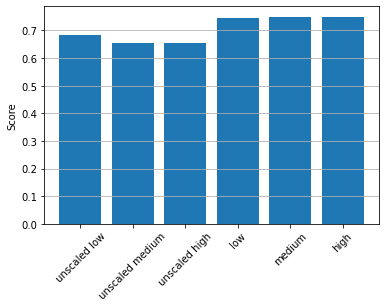

In [12]:
# plot it
ax = plt.bar(range(6), [score_low_unscaled, score_medium_unscaled, score_high_unscaled, score_low, score_medium, score_high])
plt.grid(axis='y')
plt.xticks(range(6), labels=['unscaled low', 'unscaled medium', 'unscaled high', 'low', 'medium', 'high'], rotation=45)
plt.ylabel('Score')

In [17]:
# What do these numbers mean now? 
# 1: perfect fit
# In 4.2, 9.x could be achieved
# so this is probably not the best regresion for the given data. It's not completely bad though (score lower 0 ) 
# scaling improves the score - but that might also be caused by how the score is computed. maybe smaller numbers -> better score.
# left: score on full data, right: score on test data. The model performs better on the full data, which is not surprising since it was trained on it.
# changing the hyperparameters does not achieve much better results. maybe a different kind of regression would be a good idea
# Maybe scores would be better without alpha in the input (see above)

In [ ]:
# Scaled is clearly better!
# optimum is high
# lets try better models

In [13]:
# Try two more models (medium-high and medium-low) with scaled data
reg_high1 = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(500,500,500), **parameters)
reg_high2 = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,100,100,100), **parameters)

reg_high1.fit(train_in_scaled,train_out_scaled)
reg_high2.fit(train_in_scaled,train_out_scaled)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100, 100, 100),
             learning_rate='adaptive', max_iter=750, random_state=1)

0.7473007311196762 0.750204147123668 0.7458176384677659 0.7501449361361441


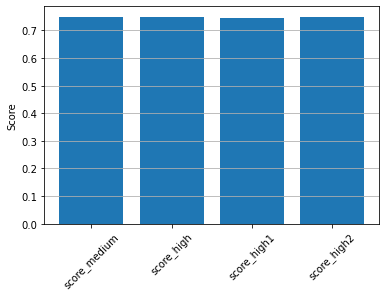

In [14]:
score_high1 = reg_high1.score(test_in_scaled, test_out_scaled)
score_high2 = reg_high2.score(test_in_scaled, test_out_scaled)

# plot it
ax = plt.bar(range(4), [score_medium, score_high, score_high1, score_high2])
plt.grid(axis='y')
plt.xticks(range(4), labels=['score_medium', 'score_high', 'score_high1', 'score_high2'], rotation=45)
plt.ylabel('Score')

print(score_medium, score_high, score_high1, score_high2)

In [ ]:
# no significant improvement for extra high models
# sometimes even worse
# sometimes medium is actually better
# lets stick to the simplest approach: MEDIUM MODEL

In [15]:
# predict some data
y_pred = reg_medium.predict(test_in_scaled)

<Figure size 432x288 with 0 Axes>

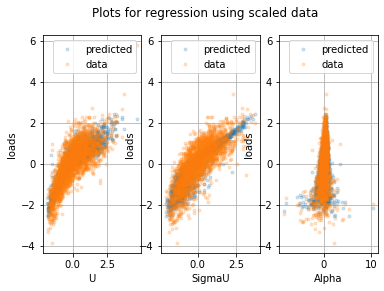

In [23]:
# plot the results for the regression using scaled
plt.figure()
fig, axs = plt.subplots(1,3)
fig.suptitle("Plots for regression using scaled data")

axs[0].plot(test_in_scaled[:,0], y_pred, '.', label="predicted",alpha=0.2)
axs[0].plot(test_in_scaled[:,0], test_out_scaled, '.', label="data",alpha=0.2)
axs[0].set_xlabel("U")

axs[1].plot(test_in_scaled[:,1], y_pred, '.', label="predicted",alpha=0.2)
axs[1].plot(test_in_scaled[:,1], test_out_scaled, '.', label="data",alpha=0.2)
axs[1].set_xlabel("SigmaU")

axs[2].plot(test_in_scaled[:,2], y_pred, '.', label="predicted",alpha=0.2)
axs[2].plot(test_in_scaled[:,2], test_out_scaled, '.', label="data",alpha=0.2)
axs[2].set_xlabel("Alpha")

for ax in axs:
    ax.legend()
    ax.grid()
    ax.set_ylabel("loads")

<Figure size 432x288 with 0 Axes>

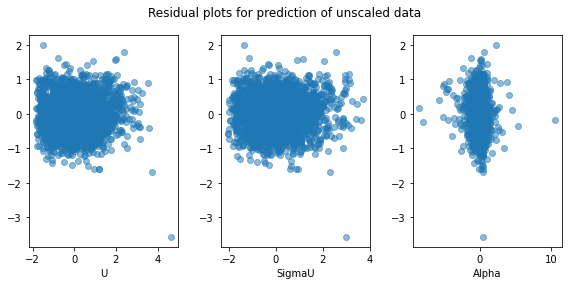

In [26]:
#Do some residual plots: 
# plot the results for the regression using unscaled
plt.figure()
#plt.tight_layout()
fig, axs = plt.subplots(1,3,figsize=(8,4))
fig.suptitle("Residual plots for prediction of unscaled data")
y_err = (y_pred - test_out_scaled)#/test_out_scaled
axs[0].scatter(test_in_scaled[:,0],y_err,label="predicted",alpha=0.5)
#axs[0].scatter(test_in[:,0],test_out,label="data",alpha=0.5)
axs[0].set_xlabel("U")

axs[1].scatter(test_in_scaled[:,1],y_err,label="predicted",alpha=0.5)
#axs[1].scatter(test_in[:,1],test_out,label="data",alpha=0.5)
axs[1].set_xlabel("SigmaU")

axs[2].scatter(test_in_scaled[:,2],y_err,label="predicted",alpha=0.5)
#axs[2].scatter(test_in[:,2],test_out,label="data",alpha=0.3)
axs[2].set_xlabel("Alpha")
fig.tight_layout(w_pad=1.8)

In [30]:
# Scores have  been computed before. But now, let's calculate some more error terms for the medium unscaled model
# r-square, RMS error, MAE)

# R² adjusted corrects for multiple parameters 
r_squared = score_medium # dummy value 
n= len(test_out) # number of samples
k= test_in.shape[1] # number of parameters
r_adjusted =1-  ( ((1-r_squared)*(n-1)) / (n-k-1 ) )
print(f"R_squared is {r_squared}, \t R squared adjusted is; {r_adjusted}")

#RMSE ;sqrt( (f-o)^2 ) 
rmse = np.sqrt((1/len(test_out))*np.sum(np.multiply(y_pred-test_out_scaled,y_pred-test_out_scaled))) # again the question is, whether to calculate it on the full data set or on the test data
#rmse = np.std(y_pred - test_out_scaled) # would also work
print(f"The root mean square error is : {rmse}")

#MAE 
mae = (1/len(test_out_scaled))*np.sum(np.abs(y_pred - test_out_scaled))

print(f"The mean absolute error is : {mae}")

R_squared is 0.7473007311196762, 	 R squared adjusted is; 0.7469970060368873
The root mean square error is : 0.5074370152279913
The mean absolute error is : 0.4014500989439528


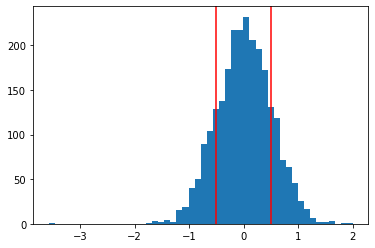

In [31]:
# It appears, that there is only slight difference between both R² values. It is not clear atm, whether these values can reallly be compared. 
# Maybe these values work better to compare different regressions, instead of being representative on its own. 
# The rmse as a number does not really say something on its own. maybe visualize it, using a histogram: 
plt.figure()
plt.hist(y_pred - test_out_scaled,bins=50)
plt.axvline(rmse,color='r')
plt.axvline(-rmse,color='r')
#Showing the histogram of the distribution of absolute errors, and the rmse (standard deviation)  